<a href="https://colab.research.google.com/github/VivianVKJ/WebDev/blob/master/HW4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##2.

a.Generate two clusters of data points.

(200, 2) (200,)


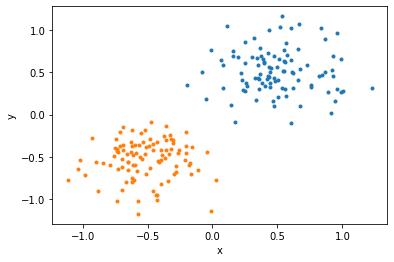

In [0]:
%matplotlib inline
import matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
kwargs = {'linewidth' : 3.5} 

var = 0.25
X1 =np.array([np.random.normal(0.5,var,(100)), np.random.normal(0.5,var,(100))])
X2 =np.array([np.random.normal(-0.5,var,(100)), np.random.normal(-0.5,var,(100))])

y1 = [1]*100
y2 = [-1]*100
X = np.concatenate((X1,X2),axis=1).T
y = np.concatenate((y1,y2),axis=0)
X = X - np.mean(X,axis=0)
print(X.shape , y.shape)

plt.plot(X1[0].T,X1[1].T,'.')
plt.plot(X2[0].T,X2[1].T,'.')
plt.xlabel('x')
plt.ylabel('y')

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [64]:
W = np.zeros((2,1))
lr = 1

for epoch in range(100):
  for idx in range(len(X_train)):
    if y_train[idx] * X_train[idx,:].reshape(1,-1) @W <= 0 :
      W = W + lr * y_train[idx] * X_train[idx, :].reshape(-1,1)
  if epoch % 20 == 0:
    y_test_pred = (X_test@W).reshape(-1)
    y_test_pred[y_test_pred < 0] = -1
    y_test_pred[y_test_pred >= 0] = 1
    
    acc = np.mean(y_test == y_test_pred)
    print(f"Epoch: {epoch}, Test Accuacy: {acc}")

Epoch: 0, Test Accuacy: 0.95
Epoch: 20, Test Accuacy: 0.9
Epoch: 40, Test Accuacy: 0.875
Epoch: 60, Test Accuacy: 0.95
Epoch: 80, Test Accuacy: 0.95


c. overlap

(200, 2) (200,)


Text(0, 0.5, 'y')

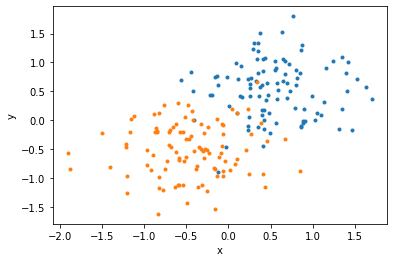

In [73]:
var = 0.5
X1 =np.array([np.random.normal(0.5,var,(100)), np.random.normal(0.5,var,(100))])
X2 =np.array([np.random.normal(-0.5,var,(100)), np.random.normal(-0.5,var,(100))])

y1 = [1]*100
y2 = [-1]*100
X = np.concatenate((X1,X2),axis=1).T
y = np.concatenate((y1,y2),axis=0)
X = X - np.mean(X,axis=0)
print(X.shape , y.shape)

plt.plot(X1[0].T,X1[1].T,'.')
plt.plot(X2[0].T,X2[1].T,'.')
plt.xlabel('x')
plt.ylabel('y')

In [80]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)


W = np.zeros((2,1))
lr = 1
for epoch in range(250):
  for idx in range(len(X_train)):
    if y_train[idx] * X_train[idx,:].reshape(1,-1) @W <= 0 :
      W = W + lr * y_train[idx] * X_train[idx, :].reshape(-1,1)
  if epoch % 50 == 0:
    y_test_pred = (X_test@W).reshape(-1)
    y_test_pred[y_test_pred < 0] = -1
    y_test_pred[y_test_pred >= 0] = 1
    
    acc = np.mean(y_test == y_test_pred)
    print(f"Epoch: {epoch}, Test Accuacy: {acc}")

Epoch: 0, Test Accuacy: 0.9
Epoch: 50, Test Accuacy: 0.65
Epoch: 100, Test Accuacy: 0.9
Epoch: 150, Test Accuacy: 0.8
Epoch: 200, Test Accuacy: 0.85


It dosen't converge.

Show the classification regions:

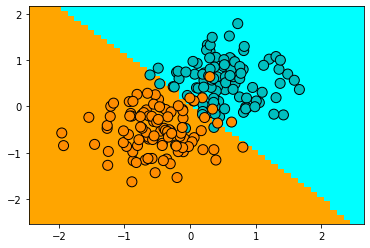

In [81]:
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
cmap_bold = ListedColormap(['darkorange', 'c'])
h = 0.1
cmap_light = ListedColormap(['orange', 'cyan'])
cmap_bold = ListedColormap(['darkorange', 'c'])

x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1 
y_min, y_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1 
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), 
                     np.arange(y_min, y_max, h))
Z = np.c_[xx.ravel(), yy.ravel()] 
Z = Z@W
Z[Z<0] = -1
Z[Z>=0] = 1

# Put the result into a color plot
Z = Z.reshape(xx.shape) 

plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=100)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.show()

##4.

a. load the dataset and display 10 representative images from each class.

In [0]:
import tensorflow as tf
from tensorflow import keras
fashion_mnist = keras.datasets.fashion_mnist 
(train_images, train_labels),(test_images, test_labels) = fashion_mnist.load_data()

train_images = train_images.reshape(train_images.shape[0],train_images.shape[1]*train_images.shape[2])
test_images = test_images.reshape(test_images.shape[0],test_images.shape[1]*test_images.shape[2])

print(train_images.shape, train_labels.shape)
print(test_images.shape, test_labels.shape)

(60000, 784) (60000,)
(10000, 784) (10000,)


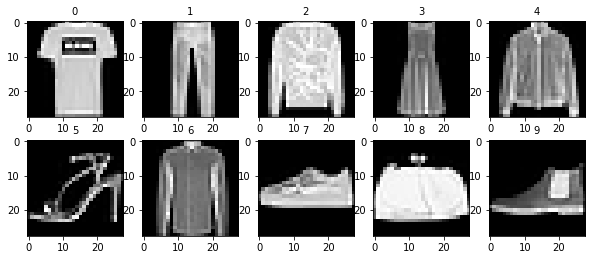

In [0]:
plot_images = []
count = 0

for index,(image, label) in enumerate(zip(train_images,train_labels)):
  if label == count:
    plot_images.append(image)
    count+=1
    if count==10:
      break
plot = np.array(plot_images)

plt.figure(figsize = (10,4))
for index in range(10):
  plt.subplot(2,5,index+1)
  plt.imshow(np.reshape(plot[index],(28,28)), cmap=plt.cm.gray)
  plt.title('%i' % index, fontsize = 10)


b. implement K-NN, Loistic regression, SVM(linear and rbf kernels)

In [0]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train_images = scaler.fit_transform(train_images)
test_images = scaler.fit_transform(test_images)
ntr = 5000
nts = 1000
Iperm = np.random.permutation(ntr)
train_images = train_images[Iperm[:ntr]]
train_labels = train_labels[Iperm[:ntr]]
test_images = test_images[Iperm[:nts]]
test_labels = test_labels[Iperm[:nts]]

print(train_images.shape, train_labels.shape) 
print(test_images.shape, test_labels.shape)

(5000, 784) (5000,)
(1000, 784) (1000,)


KNN

In [0]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
%time knn.fit(train_images,train_labels)
knn_score = knn.score(test_images,test_labels)
print(knn_score)

CPU times: user 549 ms, sys: 2.96 ms, total: 552 ms
Wall time: 559 ms
0.809


Logistic Regression

In [0]:
from sklearn.linear_model import LogisticRegression
logisticReg = LogisticRegression(penalty='l2', tol=0.1, solver = 'saga', C=1)
%time logisticReg.fit(train_images, train_labels)
lr_score = logisticReg.score(test_images, test_labels)
print(score)

CPU times: user 1.12 s, sys: 1.99 ms, total: 1.12 s
Wall time: 1.13 s
0.769


SVM

In [0]:
from sklearn import svm
svc = svm.SVC(kernel='linear', C = 1)
%time svc.fit(train_images,train_labels)
svml_score = svc.score(test_images,test_labels)
print(svml_score)

CPU times: user 8.37 s, sys: 44.2 ms, total: 8.41 s
Wall time: 8.4 s


SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [0]:
from sklearn import svm
svc_rbf = svm.SVC(kernel='rbf', C = 1)
%time svc_rbf.fit(train_images,train_labels)
svmrbf_score = svc_rbf.score(test_images,test_labels)
print(svmrbf_score)

CPU times: user 14.3 s, sys: 7.78 ms, total: 14.3 s
Wall time: 14.3 s
0.853


c. Hyperparameters

1) KNN

In [60]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10, weights='distance',p=1)
%time knn.fit(train_images,train_labels)
%time knn_score = knn.score(test_images,test_labels)
print(knn_score)

CPU times: user 390 ms, sys: 993 µs, total: 391 ms
Wall time: 401 ms
CPU times: user 8.96 s, sys: 2.97 ms, total: 8.97 s
Wall time: 8.99 s
0.814


2) logestic regression

In [61]:
logisticReg = LogisticRegression(penalty='l2', tol=0.1, solver = 'sag', C=0.001)
%time logisticReg.fit(train_images, train_labels)
%time lr_score = logisticReg.score(test_images, test_labels)
print(score)

CPU times: user 1.02 s, sys: 1.94 ms, total: 1.03 s
Wall time: 1.03 s
CPU times: user 5.73 ms, sys: 9 µs, total: 5.74 ms
Wall time: 3.36 ms
0.769


3) SVM

In [62]:
from sklearn import svm
svc = svm.SVC(kernel='linear', C = 3)
%time svc.fit(train_images,train_labels)
%time svml_score = svc.score(test_images,test_labels)
print(svml_score)


CPU times: user 6.99 s, sys: 85.8 ms, total: 7.07 s
Wall time: 7 s
CPU times: user 2.38 s, sys: 1 ms, total: 2.38 s
Wall time: 2.39 s
0.812


In [63]:
svc_rbf = svm.SVC(kernel='rbf',degree =8, gamma = 'auto', C = 3)
%time svc_rbf.fit(train_images,train_labels)
%time svmrbf_score = svc_rbf.score(test_images,test_labels)
print(svmrbf_score)

CPU times: user 11.5 s, sys: 999 µs, total: 11.5 s
Wall time: 11.5 s
CPU times: user 3.31 s, sys: 1.99 ms, total: 3.31 s
Wall time: 3.32 s
0.859



|  Time| Accuracy |Train Time | Test Time |
| :----- | :-----: | :---:|:---:|
| KNN | 81.4%  | 0.391| 8.97 |
| LR  | 76.8% |1.03  |0.0057|
| SVM(linear)|81.2%|7.07|2.38|
|SVM(rbf))|85.9%|11.5|3.31|

<br>

From the table above, SVM with linear kernel use the least time of all methods, while in the meantime has the lowest accuracy. The more accurate other methods can get, the more time they cost. SVM with rbf kernel has the best accuracy and it's slowest.